# Agrupation of data by category 

In [1]:
import numpy as np
import pandas as pd

In [2]:
gender = ["Male","Famele"]
income = ["Poor","Middle Class","Rich"]

In [3]:
rows = 500
gender_data = []
income_data = []

for i in range(0,rows):
    gender_data.append(np.random.choice(gender))
    income_data.append(np.random.choice(income))

In [4]:
gender_data[1:10]

['Famele',
 'Famele',
 'Famele',
 'Famele',
 'Male',
 'Famele',
 'Male',
 'Famele',
 'Male']

In [5]:
income_data[1:10]

['Poor',
 'Middle Class',
 'Rich',
 'Rich',
 'Poor',
 'Middle Class',
 'Poor',
 'Rich',
 'Middle Class']

In [6]:
# z = N(0,1)
#N(m,s) -> m + s*z
hight = 160 + 30  * np.random.randn(rows)
weight = 65 + 25 * np.random.randn(rows)
age = np.ceil(30 + 12 * np.random.randn(rows))
income = 18000 + 3500 * np.random.randn(rows)

In [9]:
data = pd.DataFrame(
    {
        "Gender":gender_data,
        "Social Status":income_data,
        "Hight":hight,
        "Weight":weight,
        "Age":age,
        "Income":income,        
    }
)

In [10]:
data.head(10)

,Gender,Social Status,Hight,Weight,Age,Income
0,Male,Rich,182.848422,13.234346,13.0,14105.551538
1,Famele,Poor,143.415481,17.462476,33.0,17493.312681
2,Famele,Middle Class,174.589146,61.283726,10.0,20548.431000
3,Famele,Rich,190.907554,43.905324,33.0,15954.171016
4,Famele,Rich,130.627810,69.388675,26.0,18699.602473
5,Male,Poor,179.500696,60.243483,26.0,13338.784654
6,Famele,Middle Class,154.855901,88.665384,22.0,15452.631359
7,Male,Poor,177.049784,19.720172,9.0,16832.460625
8,Famele,Rich,165.457229,88.941602,33.0,11940.336081
9,Male,Middle Class,154.683208,75.156099,4.0,20969.453319


# Data Agrupation

In [11]:
grouped_gender = data.groupby("Gender")

In [12]:
grouped_gender.groups

{'Famele': Int64Index([  1,   2,   3,   4,   6,   8,  10,  11,  12,  13,
             ...
             484, 485, 487, 489, 490, 491, 493, 494, 496, 498],
            dtype='int64', length=260),
 'Male': Int64Index([  0,   5,   7,   9,  15,  16,  18,  20,  21,  23,
             ...
             478, 481, 482, 483, 486, 488, 492, 495, 497, 499],
            dtype='int64', length=240)}

In [13]:
def printGroup(group):
    for names, groups in  group:
        print(names)
        print(groups)    

In [37]:
printGroup(grouped_gender)

Famele
     Gender Social Status       Hight      Weight   Age        Income
2    Famele          Rich  134.413610   64.029483  28.0  16430.937180
4    Famele          Rich  141.530667   74.656362  32.0  19439.815446
7    Famele          Rich  199.151050   50.060166  38.0  16604.846575
13   Famele          Poor  208.743274   54.315982  15.0  17652.367515
16   Famele          Poor  227.583959   29.107114  21.0  21351.189693
17   Famele  Middle Class  187.736989  119.624647   8.0  17517.785661
18   Famele          Rich  186.659125   66.324936  29.0  19612.204832
23   Famele  Middle Class  190.835841   53.613909  39.0  11518.836275
24   Famele          Rich  156.862907   78.749375  26.0  19641.041072
25   Famele          Rich  165.609512   81.864528  32.0  22139.058890
28   Famele          Rich  162.781651   95.576167  45.0  21649.068059
32   Famele  Middle Class  151.537631  118.289769  41.0  16396.033990
34   Famele          Rich  109.851379   64.246618  21.0  22086.641655
36   Famele  

In [15]:
womans = grouped_gender.get_group("Famele") #If just I wanna select a specific group
womans.head()

,Gender,Social Status,Hight,Weight,Age,Income
1,Famele,Poor,143.415481,17.462476,33.0,17493.312681
2,Famele,Middle Class,174.589146,61.283726,10.0,20548.431000
3,Famele,Rich,190.907554,43.905324,33.0,15954.171016
4,Famele,Rich,130.627810,69.388675,26.0,18699.602473
6,Famele,Middle Class,154.855901,88.665384,22.0,15452.631359


In [16]:
double_group = data.groupby(["Gender","Social Status"])
double_group.head()

,Gender,Social Status,Hight,Weight,Age,Income
0,Male,Rich,182.848422,13.234346,13.0,14105.551538
1,Famele,Poor,143.415481,17.462476,33.0,17493.312681
2,Famele,Middle Class,174.589146,61.283726,10.0,20548.431000
3,Famele,Rich,190.907554,43.905324,33.0,15954.171016
4,Famele,Rich,130.627810,69.388675,26.0,18699.602473
5,Male,Poor,179.500696,60.243483,26.0,13338.784654
6,Famele,Middle Class,154.855901,88.665384,22.0,15452.631359
7,Male,Poor,177.049784,19.720172,9.0,16832.460625
8,Famele,Rich,165.457229,88.941602,33.0,11940.336081
9,Male,Middle Class,154.683208,75.156099,4.0,20969.453319


## Operations on grouped data

In [39]:
double_group.sum()

Hight       Weight     Age        Income
Gender Social Status                                                 
Famele Middle Class   14157.787063  5471.668647  2973.0  1.583715e+06
       Poor           14538.867971  5872.429755  2646.0  1.614961e+06
       Rich           14248.010799  5875.578249  2887.0  1.645835e+06
Male   Middle Class   10363.795248  4084.270977  2123.0  1.206481e+06
       Poor           12841.315922  5208.641885  2406.0  1.465459e+06
       Rich           13490.382565  5517.481736  2572.0  1.502229e+06

In [40]:
 double_group.mean()

Hight     Weight        Age        Income
Gender Social Status                                                
Famele Middle Class   160.883944  62.178053  33.784091  17996.762207
       Poor           158.031174  63.830758  28.760870  17553.925187
       Rich           154.869683  63.864981  31.380435  17889.508207
Male   Middle Class   159.443004  62.834938  32.661538  18561.242816
       Poor           156.601414  63.520023  29.341463  17871.455616
       Rich           166.547933  68.117058  31.753086  18546.040718

In [41]:
double_group.size() #How many elemnts are there in each group?

Gender  Social Status
Famele  Middle Class     88
        Poor             92
        Rich             92
Male    Middle Class     65
        Poor             82
        Rich             81
dtype: int64

In [42]:
double_group.describe()

Age                                                  \
                     count       mean        std   min    25%   50%    75%   
Gender Social Status                                                         
Famele Middle Class   88.0  33.784091  13.433916   1.0  25.75  35.0  42.25   
       Poor           92.0  28.760870  12.037825  -5.0  20.75  30.5  38.00   
       Rich           92.0  31.380435  11.062105 -13.0  24.75  30.0  38.00   
Male   Middle Class   65.0  32.661538  13.269181   3.0  25.00  32.0  42.00   
       Poor           82.0  29.341463  10.722331   8.0  22.00  30.0  36.75   
       Rich           81.0  31.753086  11.486439  10.0  23.00  32.0  41.00   

                           Hight                 ...            Income  \
                       max count        mean     ...               75%   
Gender Social Status                             ...                     
Famele Middle Class   63.0  88.0  160.883944     ...      20483.083887   
       Poor           52.0  92.0  158.031174     ...      20055.562440   
       Rich           59.0  92.0  154.869683     ...      20531.410815   
Male   Middle Class   65.0  65.0  159.443004     ...      20818.289407   
       Poor           54.0  82.0  156.601414     ...      20553.893317   
       Rich           59.0  81.0  166.547933     ...      21678.009845   

                                   Weight                                   \
                               max  count       mean        std        min   
Gender Social Status                                                         
Famele Middle Class   27126.814297   88.0  62.178053  24.748365   9.035703   
       Poor           26556.413131   92.0  63.830758  28.549444  -4.908287   
       Rich           27824.984277   92.0  63.864981  25.514840   4.169175   
Male   Middle Class   24140.508416   65.0  62.834938  28.309590  13.660152   
       Poor           26104.087342   82.0  63.520023  26.419335 -13.395911   
       Rich           25686.763410   81.0  68.117058  24.755942  10.325647   

                                                                   
                            25%        50%        75%         max  
Gender Social Status                                               
Famele Middle Class   45.912014  60.524917  73.948727  125.305383  
       Poor           46.455854  63.929343  82.266232  126.283641  
       Rich           48.025901  64.205874  78.097045  131.290219  
Male   Middle Class   41.746597  65.436859  85.428597  137.376156  
       Poor           51.737252  64.991537  80.679296  110.772104  
       Rich           53.905730  70.175054  82.563515  121.014646  

[6 rows x 32 columns]

In [43]:
grouped_income = double_group["Income"]
grouped_income.describe()

count          mean          std           min  \
Gender Social Status                                                   
Famele Middle Class    88.0  17996.762207  3887.991647   8481.437823   
       Poor            92.0  17553.925187  3415.892456  10080.269883   
       Rich            92.0  17889.508207  3727.390931   9451.538726   
Male   Middle Class    65.0  18561.242816  3150.100823   8612.146474   
       Poor            82.0  17871.455616  3625.160919  10071.968535   
       Rich            81.0  18546.040718  3791.201696   9415.675408   

                               25%           50%           75%           max  
Gender Social Status                                                          
Famele Middle Class   15555.827162  17661.203701  20483.083887  27126.814297  
       Poor           15131.839884  16857.277247  20055.562440  26556.413131  
       Rich           15426.047346  18053.720682  20531.410815  27824.984277  
Male   Middle Class   16416.657349  18508.440566  20818.289407  24140.508416  
       Poor           15046.669868  18148.805256  20553.893317  26104.087342  
       Rich           15464.832030  18218.303315  21678.009845  25686.763410

In [45]:
double_group.aggregate(
    {
        "Income":np.sum,
        "Age":np.mean,
        "Hight":np.std
    }
)

Income        Age      Hight
Gender Social Status                                    
Famele Middle Class   1.583715e+06  33.784091  29.651609
       Poor           1.614961e+06  28.760870  30.474509
       Rich           1.645835e+06  31.380435  27.494120
Male   Middle Class   1.206481e+06  32.661538  26.905464
       Poor           1.465459e+06  29.341463  31.213427
       Rich           1.502229e+06  31.753086  32.375992

In [46]:
double_group.aggregate(
    {
        "Age":np.mean,
        "Hight":lambda h:np.mean(h)/np.std(h)
    }
)

Age     Hight
Gender Social Status                     
Famele Middle Class   33.784091  5.456902
       Poor           28.760870  5.214099
       Rich           31.380435  5.663694
Male   Middle Class   32.661538  5.972163
       Poor           29.341463  5.047992
       Rich           31.753086  5.176231

In [48]:
#Appy all operation to all columns
double_group.aggregate([np.sum,np.mean,np.std])

Hight                              Weight  \
                               sum        mean        std          sum   
Gender Social Status                                                     
Famele Middle Class   14157.787063  160.883944  29.651609  5471.668647   
       Poor           14538.867971  158.031174  30.474509  5872.429755   
       Rich           14248.010799  154.869683  27.494120  5875.578249   
Male   Middle Class   10363.795248  159.443004  26.905464  4084.270977   
       Poor           12841.315922  156.601414  31.213427  5208.641885   
       Rich           13490.382565  166.547933  32.375992  5517.481736   

                                               Age                        \
                           mean        std     sum       mean        std   
Gender Social Status                                                       
Famele Middle Class   62.178053  24.748365  2973.0  33.784091  13.433916   
       Poor           63.830758  28.549444  2646.0  28.760870  12.037825   
       Rich           63.864981  25.514840  2887.0  31.380435  11.062105   
Male   Middle Class   62.834938  28.309590  2123.0  32.661538  13.269181   
       Poor           63.520023  26.419335  2406.0  29.341463  10.722331   
       Rich           68.117058  24.755942  2572.0  31.753086  11.486439   

                            Income                             
                               sum          mean          std  
Gender Social Status                                           
Famele Middle Class   1.583715e+06  17996.762207  3887.991647  
       Poor           1.614961e+06  17553.925187  3415.892456  
       Rich           1.645835e+06  17889.508207  3727.390931  
Male   Middle Class   1.206481e+06  18561.242816  3150.100823  
       Poor           1.465459e+06  17871.455616  3625.160919  
       Rich           1.502229e+06  18546.040718  3791.201696

In [49]:
double_group.aggregate([lambda x:np.mean(x)/np.std(x)])

Hight    Weight       Age    Income
                      <lambda>  <lambda>  <lambda>  <lambda>
Gender Social Status                                        
Famele Middle Class   5.456902  2.526808  2.529248  4.655333
       Poor           5.214099  2.248048  2.402300  5.167057
       Rich           5.663694  2.516768  2.852295  4.825771
Male   Middle Class   5.972163  2.236837  2.480614  5.938124
       Poor           5.047992  2.419096  2.753322  4.960176
       Rich           5.176231  2.768688  2.781622  4.922343

# Data Filtering

In [50]:
double_group["Age"].filter(lambda x: x.sum()>2400)

0      37.0
1      45.0
2      28.0
3      31.0
4      32.0
5      39.0
6      30.0
7      38.0
8      22.0
9      16.0
11     44.0
12     22.0
13     15.0
14     32.0
16     21.0
17      8.0
18     29.0
19     21.0
20     36.0
22     37.0
23     39.0
24     26.0
25     32.0
27     47.0
28     45.0
29     26.0
30     59.0
31     50.0
32     41.0
34     21.0
       ... 
464    36.0
467    40.0
468    27.0
469    25.0
470    21.0
471    26.0
472    27.0
473     8.0
474    29.0
476    42.0
478    19.0
479    48.0
480    24.0
481    28.0
482    24.0
484    36.0
485    10.0
487    59.0
488    35.0
489    46.0
490    18.0
491    32.0
492    26.0
493    24.0
494     7.0
495    43.0
496    28.0
497     8.0
498    27.0
499    50.0
Name: Age, Length: 435, dtype: float64

# Transformation of variables

In [54]:
zscore = lambda x :(x - x.mean()/x.std()) #x simboloza cada una de las columnas de la tabla
double_group.transform(zscore)
z_gruop = double_group.transform(zscore)

In [53]:
import matplotlib.pyplot as plt

(array([  1.,   3.,  21.,  34., 109., 117., 115.,  65.,  27.,   8.]),
 array([-15.83675081,  -7.99922159,  -0.16169237,   7.67583686,
         15.51336608,  23.3508953 ,  31.18842453,  39.02595375,
         46.86348297,  54.7010122 ,  62.53854142]),
 <a list of 10 Patch objects>)

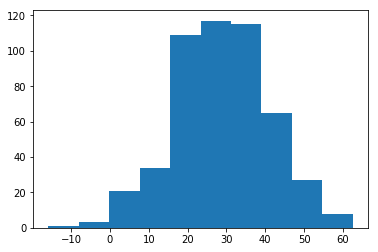

In [55]:
plt.hist(z_gruop["Age"])

In [56]:
fill_na_mean = lambda x :x.fillna(x.mean())

## Special operations

In [57]:
double_group.head(1) #Firs row of each one of collections 

,Gender,Social Status,Hight,Weight,Age,Income
0,Male,Rich,179.708627,61.694134,37.0,14853.158345
1,Male,Poor,157.849700,108.964161,45.0,10071.968535
2,Famele,Rich,134.413610,64.029483,28.0,16430.937180
10,Male,Middle Class,141.886587,85.428597,36.0,15607.429333
13,Famele,Poor,208.743274,54.315982,15.0,17652.367515
17,Famele,Middle Class,187.736989,119.624647,8.0,17517.785661


In [58]:
double_group.tail(1) #Last row of each one of collections 

,Gender,Social Status,Hight,Weight,Age,Income
486,Male,Middle Class,137.387786,23.497630,30.0,17996.944392
495,Famele,Rich,153.171836,64.165129,43.0,16229.524132
496,Famele,Middle Class,164.452202,66.488349,28.0,14232.824825
497,Male,Poor,229.509182,51.333379,8.0,18346.185855
498,Male,Rich,218.414072,81.265190,27.0,14309.007892
499,Famele,Poor,131.818050,11.529443,50.0,16822.150482


In [59]:
double_group.nth(32) #32 th in the table

Age       Hight        Income     Weight
Gender Social Status                                           
Famele Middle Class   24.0  164.200004  18533.371036  52.873776
       Poor           28.0  127.962028  13787.996927  94.546372
       Rich           16.0  159.941612  20101.906609  73.528308
Male   Middle Class   11.0  114.180088  20440.308508  87.920337
       Poor           19.0  222.440943  18218.161511  35.680103
       Rich           45.0  230.454374  22809.781238  98.330261

In [72]:
data_sorted = data.sort_values(["Social Status","Income"]) #Sort acording to a columns

In [73]:
data_sorted.head()


,Gender,Social Status,Hight,Weight,Age,Income
273,Famele,Middle Class,170.829119,42.451138,63.0,8481.437823
441,Male,Middle Class,222.927538,33.978760,47.0,8612.146474
108,Male,Middle Class,151.052982,108.739412,50.0,9621.750486
295,Famele,Middle Class,135.981214,46.615622,26.0,10150.699572
405,Famele,Middle Class,91.502489,97.014180,59.0,10310.444933


In [69]:
age_grouped = data_sorted.groupby("Social Status")

In [71]:
age_grouped.head(1)

,Gender,Social Status,Hight,Weight,Age,Income
41,Famele,Rich,137.820866,88.410316,-13.0,19111.008250
39,Famele,Poor,164.721919,77.914921,-5.0,23307.725279
310,Famele,Middle Class,171.549131,95.027076,1.0,15601.812323


In [67]:
age_grouped.tail(1)

,Gender,Social Status,Hight,Weight,Age,Income
200,Famele,Middle Class,117.732808,21.492952,63.0,18135.010215
355,Male,Middle Class,166.391213,82.282716,65.0,16416.657349
